In [95]:
import re
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Activation, LocallyConnected2D, Flatten, Conv2D, MaxPooling2D
from keras.layers import Dropout
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')
import matplotlib.pyplot as plt
import sklearn.preprocessing as pre
from keras.initializers import *
from keras.optimizers import *
from sklearn.model_selection import train_test_split
from keras import regularizers
from sklearn.model_selection import StratifiedKFold
import seaborn as sb
from sklearn.metrics import confusion_matrix

In [96]:
scaler = pre.MinMaxScaler(feature_range=(0,1))
#sb.set(rc={'figure.figsize':(10,10)})

In [97]:
header=['id', 'ccf', 'age', 'sex', 'painLocation', 'painExcertion', 'painResting', 'pncaden', 'chestPainType',
        'restingBP','hyperTension', 'cholestrol', 'smoker', 'noOfCigarette' , 'smokingYears', 'bloodSugar',
        'historyOfDiabetes', 'historyOfHA', 'restingECG', 'ekgmo', 'ekgday', 'ekgyr', 'dig',
        'prop', 'nitr', 'pro' ,'diuretic', 'proto', 'stressTestDuration', 'stressTestSTTime', 'stressTestMet',
        'stressTestMaxHR', 'stressTestRestingHR', 'stressTestMaxFirstBPS','stressTestMaxSecondBPS', 'dummy',
        'stressTestRestingBP', 'exerciseAngina', 'xhypo', 'STDepressionExercise', 'STDepressionSlope',
        'rldv5','rldv5e', 'coloredVesselsFluroscopy', 'restckm','exerckm','restef', 'restwm', 'exeref', 'exerwm',
        'heartWallDamage', 'thalsev', 'thalpul', 'earlobe', 'cmo', 'cday', 'cyr', 'output', 'lmt',
 'ladprox', 'laddist', 'diag', 'cxmain', 'ramus', 'om1', 'om2', 'rcaprox', 'rcadist', 'lvx1', 'lvx2', 'lvx3', 'lvx4',
 'lvf', 'cathef', 'junk', 'name']

In [98]:
columnsToDrop=['id', 'ccf', 'painExcertion', 'painResting', 'pncaden','historyOfDiabetes', 'ekgmo', 'ekgday',
               'ekgyr', 'dig', 'prop', 'nitr', 'pro' ,'diuretic', 'proto','stressTestMet', 'dummy', 'xhypo',
               'rldv5','rldv5e','restckm','exerckm','restef', 'restwm', 'exeref','exerwm', 'thalsev', 'thalpul',
               'earlobe', 'cmo', 'cday', 'cyr', 'lmt', 'ladprox', 'laddist', 'diag','cxmain', 'ramus', 'om1', 'om2',
               'rcaprox', 'rcadist', 'lvx1', 'lvx2', 'lvx3', 'lvx4','lvf', 'cathef', 'junk', 'name']

### Reformatting and Preprocessing the four datasets

In [99]:
with open('cleveland.data.txt', 'r', errors='replace', encoding='utf-8') as fp:
    line=fp.readlines()

In [100]:
with open('processedCleveland.txt', 'w', encoding='utf-8')as fp:
    s=""
    for l in line:
        s=s+l.strip()+" "
        if(l.split()[-1]=="name"):
            fp.write(s.strip()+"\n")
            s=""

In [101]:
clevelandData=pd.read_csv("processedCleveland.txt", delimiter=" ", error_bad_lines=False, names=header)
clevelandData=clevelandData.dropna()

In [102]:
with open('hungarian.data.txt', 'r', errors='replace', encoding='utf-8') as fp:
    line=fp.readlines()

In [103]:
with open('processedHungarian.txt','w', encoding='utf-8')as fp:
    s=""
    for l in line:
        s=s+l.strip()+" "
        if(l.split()[-1]=="name"):
            fp.write(s.strip()+"\n")
            s=""

In [104]:
hungarianData=pd.read_csv("processedHungarian.txt", delimiter=" ", error_bad_lines=False, names=header)
hungarianData=hungarianData.dropna()

In [105]:
with open('switzerland.data.txt', 'r', errors='replace', encoding='utf-8') as fp:
    line=fp.readlines()

In [106]:
with open('processedSwitzerland.txt','w', encoding='utf-8')as fp:
    s=""
    for l in line:
        s=s+l.strip()+" "
        if(l.split()[-1]=="name"):
            fp.write(s.strip()+"\n")
            s=""

In [107]:
switzerlandData=pd.read_csv("processedSwitzerland.txt", delimiter=" ", error_bad_lines=False, names=header)
switzerlandData=switzerlandData.dropna()

In [108]:
with open('long-beach-va.data.txt', 'r', errors='replace', encoding='utf-8') as fp:
    line=fp.readlines()

In [109]:
with open('processedLongBeach.txt','w', encoding='utf-8')as fp:
    s=""
    for l in line:
        s=s+l.strip()+" "
        if(l.split()[-1]=="name"):
            fp.write(s.strip()+"\n")
            s=""

In [110]:
longBeachData=pd.read_csv("processedLongBeach.txt", delimiter=" ", error_bad_lines=False, names=header)
longBeachData=longBeachData.dropna()

### Combining all the datasets

In [111]:
frames=[clevelandData,hungarianData,longBeachData,switzerlandData]
data=pd.concat(frames)

In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 900 entries, 0 to 122
Data columns (total 76 columns):
id                          900 non-null object
ccf                         900 non-null object
age                         900 non-null object
sex                         900 non-null float64
painLocation                900 non-null float64
painExcertion               900 non-null float64
painResting                 900 non-null float64
pncaden                     900 non-null float64
chestPainType               900 non-null object
restingBP                   900 non-null object
hyperTension                900 non-null object
cholestrol                  900 non-null float64
smoker                      900 non-null object
noOfCigarette               900 non-null float64
smokingYears                900 non-null float64
bloodSugar                  900 non-null float64
historyOfDiabetes           900 non-null float64
historyOfHA                 900 non-null float64
restingECG          

In [113]:
data.head()

,id,ccf,age,sex,painLocation,painExcertion,painResting,pncaden,chestPainType,restingBP,hyperTension,cholestrol,smoker,noOfCigarette,smokingYears,bloodSugar,historyOfDiabetes,historyOfHA,restingECG,ekgmo,ekgday,ekgyr,dig,prop,nitr,pro,diuretic,proto,stressTestDuration,stressTestSTTime,stressTestMet,stressTestMaxHR,stressTestRestingHR,stressTestMaxFirstBPS,stressTestMaxSecondBPS,dummy,stressTestRestingBP,exerciseAngina,xhypo,STDepressionExercise,STDepressionSlope,rldv5,rldv5e,coloredVesselsFluroscopy,restckm,exerckm,restef,restwm,exeref,exerwm,heartWallDamage,thalsev,thalpul,earlobe,cmo,cday,cyr,output,lmt,ladprox,laddist,diag,cxmain,ramus,om1,om2,rcaprox,rcadist,lvx1,lvx2,lvx3,lvx4,lvf,cathef,junk,name
0,1,0,63,1.0,-9.0,-9.0,-9.0,-9.0,1,145,1,233.0,-9,50.0,20.0,1.0,-9.0,1.0,2.0,2.0,3.0,81,0.0,0.0,0,0,0.0,1.0,10.5,6.0,13.0,150.0,60.0,190.0,90.0,145.0,85.0,0.0,0,2.3,3.0,-9,172.0,0,-9,-9.0,-9.0,-9.0,-9.0,-9.0,6.0,-9.0,-9.0,-9,2.0,16.0,81.0,0.0,1.0,1.0,1.0,-9.0,1.0,-9.0,1.0,-9.0,1.0,1.0,1.0,1,1.0,1,1,-9,-9.0,name
1,2,0,67,1.0,-9.0,-9.0,-9.0,-9.0,4,160,1,286.0,-9,40.0,40.0,0.0,-9.0,1.0,2.0,3.0,5.0,81,0.0,1.0,0,0,0.0,1.0,9.5,6.0,13.0,108.0,64.0,160.0,90.0,160.0,90.0,1.0,0,1.5,2.0,-9,185.0,3,-9,-9.0,-9.0,-9.0,-9.0,-9.0,3.0,-9.0,-9.0,-9,2.0,5.0,81.0,2.0,1.0,2.0,2.0,-9.0,2.0,-9.0,1.0,-9.0,1.0,1.0,1.0,1,1.0,1,1,-9,-9.0,name
2,3,0,67,1.0,-9.0,-9.0,-9.0,-9.0,4,120,1,229.0,-9,20.0,35.0,0.0,-9.0,1.0,2.0,2.0,19.0,81,0.0,1.0,0,0,0.0,1.0,8.5,6.0,10.0,129.0,78.0,140.0,80.0,120.0,80.0,1.0,0,2.6,2.0,-9,150.0,2,-9,-9.0,-9.0,-9.0,-9.0,-9.0,7.0,-9.0,-9.0,-9,2.0,20.0,81.0,1.0,1.0,1.0,1.0,-9.0,1.0,-9.0,1.0,-9.0,2.0,2.0,1.0,1,1.0,7,3,-9,-9.0,name
3,4,0,37,1.0,-9.0,-9.0,-9.0,-9.0,3,130,0,250.0,-9,0.0,0.0,0.0,-9.0,1.0,0.0,2.0,13.0,81,0.0,1.0,0,0,0.0,1.0,13.0,13.0,17.0,187.0,84.0,195.0,68.0,130.0,78.0,0.0,0,3.5,3.0,-9,167.0,0,-9,-9.0,-9.0,-9.0,-9.0,-9.0,3.0,-9.0,-9.0,-9,2.0,4.0,81.0,0.0,1.0,1.0,1.0,-9.0,1.0,-9.0,1.0,-9.0,1.0,1.0,1.0,1,1.0,1,1,-9,-9.0,name
4,6,0,41,0.0,-9.0,-9.0,-9.0,-9.0,2,130,1,204.0,-9,0.0,0.0,0.0,-9.0,1.0,2.0,2.0,7.0,81,0.0,0.0,0,0,0.0,1.0,7.0,-9.0,9.0,172.0,71.0,160.0,74.0,130.0,86.0,0.0,0,1.4,1.0,-9,40.0,0,-9,-9.0,-9.0,-9.0,-9.0,-9.0,3.0,-9.0,-9.0,-9,2.0,18.0,81.0,0.0,1.0,1.0,1.0,-9.0,1.0,-9.0,1.0,-9.0,1.0,1.0,1.0,1,1.0,1,1,-9,-9.0,name


In [114]:
data=data.drop(columnsToDrop,axis=1)

In [115]:
data.head()

,age,sex,painLocation,chestPainType,restingBP,hyperTension,cholestrol,smoker,noOfCigarette,smokingYears,bloodSugar,historyOfHA,restingECG,stressTestDuration,stressTestSTTime,stressTestMaxHR,stressTestRestingHR,stressTestMaxFirstBPS,stressTestMaxSecondBPS,stressTestRestingBP,exerciseAngina,STDepressionExercise,STDepressionSlope,coloredVesselsFluroscopy,heartWallDamage,output
0,63,1.0,-9.0,1,145,1,233.0,-9,50.0,20.0,1.0,1.0,2.0,10.5,6.0,150.0,60.0,190.0,90.0,85.0,0.0,2.3,3.0,0,6.0,0.0
1,67,1.0,-9.0,4,160,1,286.0,-9,40.0,40.0,0.0,1.0,2.0,9.5,6.0,108.0,64.0,160.0,90.0,90.0,1.0,1.5,2.0,3,3.0,2.0
2,67,1.0,-9.0,4,120,1,229.0,-9,20.0,35.0,0.0,1.0,2.0,8.5,6.0,129.0,78.0,140.0,80.0,80.0,1.0,2.6,2.0,2,7.0,1.0
3,37,1.0,-9.0,3,130,0,250.0,-9,0.0,0.0,0.0,1.0,0.0,13.0,13.0,187.0,84.0,195.0,68.0,78.0,0.0,3.5,3.0,0,3.0,0.0
4,41,0.0,-9.0,2,130,1,204.0,-9,0.0,0.0,0.0,1.0,2.0,7.0,-9.0,172.0,71.0,160.0,74.0,86.0,0.0,1.4,1.0,0,3.0,0.0


In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 900 entries, 0 to 122
Data columns (total 26 columns):
age                         900 non-null object
sex                         900 non-null float64
painLocation                900 non-null float64
chestPainType               900 non-null object
restingBP                   900 non-null object
hyperTension                900 non-null object
cholestrol                  900 non-null float64
smoker                      900 non-null object
noOfCigarette               900 non-null float64
smokingYears                900 non-null float64
bloodSugar                  900 non-null float64
historyOfHA                 900 non-null float64
restingECG                  900 non-null float64
stressTestDuration          900 non-null float64
stressTestSTTime            900 non-null float64
stressTestMaxHR             900 non-null float64
stressTestRestingHR         900 non-null float64
stressTestMaxFirstBPS       900 non-null float64
stressTestMaxSecon

### Processing of the data

In [117]:
def processPainLocation(columns):
    if(columns[0]==-9):
        if(columns[1]>0):
            if(columns[2]==1):
                return 0
            return 1
        return 0
    return columns[0]

In [118]:
def replaceByMean(columns,mean):
    if(columns[0]<1):
        return int(mean)
    return columns[0]

In [119]:
def processHypertension(columns):
    if(columns[0]==-9):
        if(columns[1]>120):
            return 1
        return 0
    return columns[0]

In [120]:
def processCholestrol(columns):
    if(columns[0]<=200):
        return 0
    elif(columns[0]<=239):
        return 1
    else:
        return 2

In [121]:
def processSmoking(columns):
    if(columns[0]==-9):
        if(int(columns[1])>0):
            return 1
        elif(int(columns[1])==0):
            return 0
        if(int(columns[2])>0):
            return 1
        elif(int(columns[2])==0):
            return 0
    return int(columns[0])

In [122]:
def addDummyCategory(columns):
    if(columns[0]==-9):
        return -1
    return columns[0]

In [123]:
def processRestingECG(columns):
    if(columns[0]==2):
        return 1
    return columns[0]

In [124]:
def processstressTestSTTime(columns):
    if(columns[0]==-9):
        return -1
    return columns[0]

In [125]:
def processExerciseAgnia(columns):
    if(columns[0]==-9):
        if(columns[1]==1):
            return 1
        return 0
    return columns[0]

In [126]:
def processSTDepressionSlope(columns):
    if(columns[0]<1):
        return -1
    if(columns[0]==1):
        return 1
    if(columns[0]==2):
        return 0
    if(columns[0]==3):
        return 2
    return columns[0]

In [127]:
def processcoloredVesselsFluroscopy(columns):
    if(columns[0]==-9 or columns[0]==9):
        return -1
    return columns[0]

In [128]:
def processHeartWallDamage(columns):
    if(columns[0]==-9):
        return -1
    if(columns[0]<=3):
        return 0
    if(columns[0]<=6):
        return 2
    if(columns[0]==7):
        return 1

In [129]:
def processOutput(columns):
    if(columns[0]>1):
        return 1
    return 0

In [130]:
data = data.sample(frac=1).reset_index(drop=True)

In [131]:
data['age']=pd.to_numeric(data['age'])
d=data[data.age !=-9]
d=d[d.age != 0]
mean=d['age'].mean()
mean=data['age'].mean()
data['age']=data[['age']].apply(replaceByMean,args=(mean,),axis=1)

In [132]:
data['sex']=pd.to_numeric(data['sex'])

In [133]:
data['painLocation']=data[['painLocation','output','bloodSugar']].apply(processPainLocation,axis=1)

In [134]:
data['chestPainType']=pd.to_numeric(data['chestPainType'])

In [135]:
dummyList = pd.get_dummies(data['chestPainType'], prefix='chestPainType')
data=data.drop('chestPainType',axis=1)
data=data.join(dummyList)

In [136]:
data['restingBP']=pd.to_numeric(data['restingBP'])
d=data[data.restingBP !=-9]
d=d[d.restingBP != 0]
mean=d['restingBP'].mean()
data['restingBP']=data[['restingBP']].apply(replaceByMean,args=(mean,),axis=1)

In [137]:
data['hyperTension']=pd.to_numeric(data['hyperTension'])
data['hyperTension']=data[['hyperTension','restingBP']].apply(processHypertension,axis=1)

In [138]:
data['cholestrol']=pd.to_numeric(data['cholestrol'])
d=data[data.cholestrol !=-9]
d=d[d.cholestrol != 0]
mean=d['cholestrol'].mean()
data['cholestrol']=data[['cholestrol']].apply(replaceByMean,args=(mean,),axis=1)

In [139]:
data['cholestrol']=data[['cholestrol']].apply(processCholestrol,axis=1)

In [140]:
dummyList = pd.get_dummies(data['cholestrol'], prefix='cholestrol')
data=data.join(dummyList)
data=data.drop('cholestrol',axis=1)

In [141]:
data['smoker']=pd.to_numeric(data['smoker'])
data['smoker']=data[['smoker','smokingYears','noOfCigarette']].apply(processSmoking,axis=1)

In [142]:
data['smoker']=data[['smoker']].apply(addDummyCategory,axis=1)

In [143]:
dummyList = pd.get_dummies(data['smoker'], prefix='smoker')
data=data.join(dummyList)
data=data.drop('smoker',axis=1)

In [144]:
data['bloodSugar']=pd.to_numeric(data['bloodSugar'])
data['bloodSugar']=data[['bloodSugar']].apply(addDummyCategory,axis=1)

In [145]:
data.at[data[data.bloodSugar==40].index[0],'bloodSugar']=int(-1)

In [146]:
dummyList = pd.get_dummies(data['bloodSugar'], prefix='bloodSugar')
data=data.join(dummyList)
data=data.drop('bloodSugar',axis=1)

In [147]:
data['historyOfHA']=pd.to_numeric(data['historyOfHA'])
data['historyOfHA']=data[['historyOfHA']].apply(addDummyCategory,axis=1)

In [148]:
dummyList = pd.get_dummies(data['historyOfHA'], prefix='historyOfHA')
data=data.join(dummyList)
data=data.drop('historyOfHA',axis=1)

In [149]:
data['restingECG']=pd.to_numeric(data['restingECG'])

In [150]:
data.at[data[data.restingECG==-9].index[0],'restingECG']=int(0)
data.at[data[data.restingECG==-9].index[0],'restingECG']=int(0)
data.at[data[data.restingECG==0.4].index[0],'restingECG']=int(0)

In [151]:
dummyList = pd.get_dummies(data['restingECG'], prefix='restingECG')
data=data.join(dummyList)
data=data.drop('restingECG',axis=1)

In [152]:
#data['restingECG']=data[['restingECG']].apply(processRestingECG,axis=1)

In [153]:
data['stressTestDuration']=pd.to_numeric(data['stressTestDuration'])
data['stressTestDuration']=data[['stressTestDuration']].apply(replaceByMean,args=(mean,),axis=1)

In [154]:
data['stressTestSTTime']=pd.to_numeric(data['stressTestSTTime'])
data['stressTestSTTime']=data[['stressTestSTTime']].apply(addDummyCategory,axis=1)

In [155]:
data['stressTestMaxHR']=pd.to_numeric(data['stressTestMaxHR'])
d=data[data.stressTestMaxHR !=-9]
mean=d['stressTestMaxHR'].mean()
data['stressTestMaxHR']=data[['stressTestMaxHR']].apply(replaceByMean,args=(mean,),axis=1)
data.at[data[data.stressTestMaxHR==8105].index[0],'stressTestMaxHR']=int(mean)

In [156]:
data['stressTestRestingHR']=pd.to_numeric(data['stressTestRestingHR'])
d=data[data.stressTestRestingHR !=-9]
mean=d['stressTestRestingHR'].mean()
data['stressTestRestingHR']=data[['stressTestRestingHR']].apply(replaceByMean,args=(mean,),axis=1)
data.at[data[data.stressTestRestingHR==1.0].index[0],'stressTestRestingHR']=int(mean)
data.at[data[data.stressTestRestingHR==37.0].index[0],'stressTestRestingHR']=int(mean)
data.at[data[data.stressTestRestingHR==39.0].index[0],'stressTestRestingHR']=int(mean)

In [157]:
data['stressTestMaxFirstBPS']=pd.to_numeric(data['stressTestMaxFirstBPS'])
d=data[data.stressTestMaxFirstBPS !=-9]
mean=d['stressTestMaxFirstBPS'].mean()
data['stressTestMaxFirstBPS']=data[['stressTestMaxFirstBPS']].apply(replaceByMean,args=(mean,),axis=1)

In [158]:
data['stressTestMaxSecondBPS']=pd.to_numeric(data['stressTestMaxSecondBPS'])
d=data[data.stressTestMaxSecondBPS !=-9]
mean=d['stressTestMaxSecondBPS'].mean()
data['stressTestMaxSecondBPS']=data[['stressTestMaxSecondBPS']].apply(replaceByMean,args=(mean,),axis=1)
data.at[data[data.stressTestMaxSecondBPS==1.0].index[0],'stressTestMaxSecondBPS']=int(mean)
data.at[data[data.stressTestMaxSecondBPS==11.0].index[0],'stressTestMaxSecondBPS']=int(mean)
data.at[data[data.stressTestMaxSecondBPS==26.0].index[0],'stressTestMaxSecondBPS']=int(mean)

In [159]:
data['stressTestRestingBP']=pd.to_numeric(data['stressTestRestingBP'])
d=data[data.stressTestRestingBP !=-9]
mean=d['stressTestRestingBP'].mean()
data['stressTestRestingBP']=data[['stressTestRestingBP']].apply(replaceByMean,args=(mean,),axis=1)
data.at[data[data.stressTestRestingBP==1018].index[0],'stressTestRestingBP']=int(mean)

In [160]:
data['exerciseAngina']=pd.to_numeric(data['exerciseAngina'])
data['exerciseAngina']=data[['exerciseAngina','painLocation']].apply(processExerciseAgnia,axis=1)
data.at[data[data.exerciseAngina==101881].index[0],'exerciseAngina']=int(1)

In [161]:
data['STDepressionExercise']=pd.to_numeric(data['STDepressionExercise'])
d=data[data.STDepressionExercise !=-9]
mean=d['STDepressionExercise'].mean()
data['STDepressionExercise']=data[['STDepressionExercise']].apply(replaceByMean,args=(mean,),axis=1)

In [162]:
data['STDepressionSlope']=pd.to_numeric(data['STDepressionSlope'])
data['STDepressionSlope']=data[['STDepressionSlope']].apply(processSTDepressionSlope,axis=1)

In [163]:
dummyList = pd.get_dummies(data['STDepressionSlope'], prefix='STDepressionSlope')
data=data.join(dummyList)
data=data.drop('STDepressionSlope',axis=1)

In [164]:
data['coloredVesselsFluroscopy']=pd.to_numeric(data['coloredVesselsFluroscopy'])
data['coloredVesselsFluroscopy']=data[['coloredVesselsFluroscopy']].apply(processcoloredVesselsFluroscopy,axis=1)

In [165]:
dummyList = pd.get_dummies(data['coloredVesselsFluroscopy'], prefix='coloredVesselsFluroscopy')
data=data.join(dummyList)
data=data.drop('coloredVesselsFluroscopy',axis=1)

In [166]:
data['heartWallDamage']=pd.to_numeric(data['heartWallDamage'])
data['heartWallDamage']=data[['heartWallDamage']].apply(processHeartWallDamage,axis=1)

In [167]:
dummyList = pd.get_dummies(data['heartWallDamage'], prefix='heartWallDamage')
data=data.join(dummyList)
data=data.drop('heartWallDamage',axis=1)

In [168]:
data['output']=pd.to_numeric(data['output'])
data['output']=data[['output']].apply(processOutput,axis=1)

In [169]:
dataOutput=pd.DataFrame(data['output'])

In [170]:
dataOutput.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 1 columns):
output    900 non-null int64
dtypes: int64(1)
memory usage: 7.1 KB


In [171]:
data=data.drop(['noOfCigarette' , 'smokingYears'],axis=1)

In [172]:
data=data.drop(['output'],axis=1)

In [173]:
pd.set_option('display.max_columns', None)
data.head()

,age,sex,painLocation,restingBP,hyperTension,stressTestDuration,stressTestSTTime,stressTestMaxHR,stressTestRestingHR,stressTestMaxFirstBPS,stressTestMaxSecondBPS,stressTestRestingBP,exerciseAngina,STDepressionExercise,chestPainType_1,chestPainType_2,chestPainType_3,chestPainType_4,cholestrol_0,cholestrol_1,cholestrol_2,smoker_-1,smoker_0,smoker_1,bloodSugar_-1.0,bloodSugar_0.0,bloodSugar_1.0,historyOfHA_-1.0,historyOfHA_0.0,historyOfHA_1.0,restingECG_0.0,restingECG_1.0,restingECG_2.0,STDepressionSlope_-1,STDepressionSlope_0,STDepressionSlope_1,STDepressionSlope_2,coloredVesselsFluroscopy_-1,coloredVesselsFluroscopy_0,coloredVesselsFluroscopy_1,coloredVesselsFluroscopy_2,coloredVesselsFluroscopy_3,heartWallDamage_-1,heartWallDamage_0,heartWallDamage_1,heartWallDamage_2
0,59,1.0,1.0,140,0,10.0,-1.0,140.0,78.0,220.0,110.0,90.0,0.0,0.0,0,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
1,52,1.0,0.0,128,1,11.0,0.0,184.0,96.0,182.0,68.0,78.0,0.0,0.0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0
2,35,1.0,1.0,132,0,250.0,-1.0,146.0,75.0,171.0,87.0,84.0,1.0,0.0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0
3,41,0.0,0.0,126,1,7.0,-1.0,163.0,94.0,140.0,70.0,90.0,0.0,0.0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0
4,55,1.0,1.0,145,0,6.0,5.0,96.0,68.0,170.0,100.0,90.0,1.0,2.0,0,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0


In [174]:
#data=data.drop(['smoker_-1','bloodSugar_-1.0','historyOfHA_-1.0','STDepressionSlope_-1',
#               'coloredVesselsFluroscopy_-1','heartWallDamage_-1'],axis=1)

In [175]:
pd.set_option('display.max_columns', None)
data.head()

,age,sex,painLocation,restingBP,hyperTension,stressTestDuration,stressTestSTTime,stressTestMaxHR,stressTestRestingHR,stressTestMaxFirstBPS,stressTestMaxSecondBPS,stressTestRestingBP,exerciseAngina,STDepressionExercise,chestPainType_1,chestPainType_2,chestPainType_3,chestPainType_4,cholestrol_0,cholestrol_1,cholestrol_2,smoker_-1,smoker_0,smoker_1,bloodSugar_-1.0,bloodSugar_0.0,bloodSugar_1.0,historyOfHA_-1.0,historyOfHA_0.0,historyOfHA_1.0,restingECG_0.0,restingECG_1.0,restingECG_2.0,STDepressionSlope_-1,STDepressionSlope_0,STDepressionSlope_1,STDepressionSlope_2,coloredVesselsFluroscopy_-1,coloredVesselsFluroscopy_0,coloredVesselsFluroscopy_1,coloredVesselsFluroscopy_2,coloredVesselsFluroscopy_3,heartWallDamage_-1,heartWallDamage_0,heartWallDamage_1,heartWallDamage_2
0,59,1.0,1.0,140,0,10.0,-1.0,140.0,78.0,220.0,110.0,90.0,0.0,0.0,0,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
1,52,1.0,0.0,128,1,11.0,0.0,184.0,96.0,182.0,68.0,78.0,0.0,0.0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0
2,35,1.0,1.0,132,0,250.0,-1.0,146.0,75.0,171.0,87.0,84.0,1.0,0.0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0
3,41,0.0,0.0,126,1,7.0,-1.0,163.0,94.0,140.0,70.0,90.0,0.0,0.0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0
4,55,1.0,1.0,145,0,6.0,5.0,96.0,68.0,170.0,100.0,90.0,1.0,2.0,0,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0


In [176]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 46 columns):
age                            900 non-null int64
sex                            900 non-null float64
painLocation                   900 non-null float64
restingBP                      900 non-null int64
hyperTension                   900 non-null int64
stressTestDuration             900 non-null float64
stressTestSTTime               900 non-null float64
stressTestMaxHR                900 non-null float64
stressTestRestingHR            900 non-null float64
stressTestMaxFirstBPS          900 non-null float64
stressTestMaxSecondBPS         900 non-null float64
stressTestRestingBP            900 non-null float64
exerciseAngina                 900 non-null float64
STDepressionExercise           900 non-null float64
chestPainType_1                900 non-null uint8
chestPainType_2                900 non-null uint8
chestPainType_3                900 non-null uint8
chestPainType_4        

### Training of the model

In [177]:
trainingData_X, testingData_X, trainingData_Y, testingData_Y = train_test_split(data,
                                                                                dataOutput,
                                                                                test_size = 0.2,
                                                                                random_state=5)

In [178]:
x_train=trainingData_X.values

sacler=scaler.fit(x_train)
x_train=scaler.transform(x_train)

In [179]:
x_test=testingData_X.values

sacler=scaler.fit(x_test)
x_test=scaler.transform(x_test)

In [180]:
y_train=trainingData_Y.values
y_test=testingData_Y.values

In [181]:
x_train=x_train.astype('float32')
y_train=y_train.astype('float32')
x_test=x_test.astype('float32')
y_test=y_test.astype('float32')

In [182]:
#y_train = np_utils.to_categorical(y_train)
#y_test = np_utils.to_categorical(y_test)

In [183]:
firstLayer=x_train.shape[1]
secondLayer=int(x_train.shape[1]/2)
thirdLayer=int(secondLayer/2)
fourthLayer=y_train.shape[1]

In [184]:
print(firstLayer," ",secondLayer," ",thirdLayer," ",fourthLayer)

46   23   11   1


In [185]:
model=Sequential()
model.add(Dense(firstLayer, input_dim=x_train.shape[1], activation='relu',
                kernel_initializer=he_normal(seed=None),
                bias_initializer=Constant(value=0)))
model.add(Dropout(0.2))
model.add(Dense(secondLayer,activation='relu',
                kernel_initializer=he_normal(seed=None),
                bias_initializer=Constant(value=0),
               kernel_regularizer=regularizers.l1(0.01)))
model.add(Dropout(0.4))
model.add(Dense(fourthLayer, activation='sigmoid',kernel_initializer=he_normal(seed=None),
                bias_initializer=Constant(value=0)))

In [186]:
model.compile(loss='mse', optimizer=Adam(lr=0.0001),metrics=['accuracy'])

In [187]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 46)                2162      
_________________________________________________________________
dropout_3 (Dropout)          (None, 46)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 23)                1081      
_________________________________________________________________
dropout_4 (Dropout)          (None, 23)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 24        
Total params: 3,267
Trainable params: 3,267
Non-trainable params: 0
_________________________________________________________________


In [188]:
history=model.fit(x_train, y_train, validation_split=0.1, epochs=1000,batch_size=16)

Train on 648 samples, validate on 72 samples
Epoch 1/1000
648/648 [==============================] - 0s 480us/step - loss: 1.8134 - acc: 0.4954 - val_loss: 1.7844 - val_acc: 0.5278
Epoch 2/1000
648/648 [==============================] - 0s 100us/step - loss: 1.7705 - acc: 0.5262 - val_loss: 1.7396 - val_acc: 0.6250
Epoch 3/1000
648/648 [==============================] - 0s 117us/step - loss: 1.7279 - acc: 0.5262 - val_loss: 1.6963 - val_acc: 0.6528
Epoch 4/1000
648/648 [==============================] - 0s 108us/step - loss: 1.6856 - acc: 0.5494 - val_loss: 1.6541 - val_acc: 0.7083
Epoch 5/1000
648/648 [==============================] - 0s 116us/step - loss: 1.6519 - acc: 0.5417 - val_loss: 1.6140 - val_acc: 0.7500
Epoch 6/1000
648/648 [==============================] - 0s 113us/step - loss: 1.6024 - acc: 0.5849 - val_loss: 1.5738 - val_acc: 0.7500
Epoch 7/1000
648/648 [==============================] - 0s 113us/step - loss: 1.5644 - acc: 0.6142 - val_loss: 1.5350 - val_acc: 0.7361
Epo

648/648 [==============================] - 0s 133us/step - loss: 0.3975 - acc: 0.7006 - val_loss: 0.3806 - val_acc: 0.7083
Epoch 61/1000
648/648 [==============================] - 0s 142us/step - loss: 0.3915 - acc: 0.6867 - val_loss: 0.3721 - val_acc: 0.7083
Epoch 62/1000
648/648 [==============================] - 0s 218us/step - loss: 0.3821 - acc: 0.6759 - val_loss: 0.3638 - val_acc: 0.7083
Epoch 63/1000
648/648 [==============================] - 0s 144us/step - loss: 0.3731 - acc: 0.6867 - val_loss: 0.3553 - val_acc: 0.7083
Epoch 64/1000
648/648 [==============================] - 0s 116us/step - loss: 0.3631 - acc: 0.7006 - val_loss: 0.3475 - val_acc: 0.7083
Epoch 65/1000
648/648 [==============================] - 0s 120us/step - loss: 0.3564 - acc: 0.7083 - val_loss: 0.3396 - val_acc: 0.7083
Epoch 66/1000
648/648 [==============================] - 0s 134us/step - loss: 0.3529 - acc: 0.6883 - val_loss: 0.3323 - val_acc: 0.7083
Epoch 67/1000
648/648 [==============================] 

Epoch 120/1000
648/648 [==============================] - 0s 113us/step - loss: 0.2131 - acc: 0.7022 - val_loss: 0.2030 - val_acc: 0.6806
Epoch 121/1000
648/648 [==============================] - 0s 117us/step - loss: 0.2155 - acc: 0.6929 - val_loss: 0.2028 - val_acc: 0.6667
Epoch 122/1000
648/648 [==============================] - 0s 107us/step - loss: 0.2118 - acc: 0.7022 - val_loss: 0.2025 - val_acc: 0.6667
Epoch 123/1000
648/648 [==============================] - 0s 118us/step - loss: 0.2157 - acc: 0.6991 - val_loss: 0.2021 - val_acc: 0.6667
Epoch 124/1000
648/648 [==============================] - 0s 126us/step - loss: 0.2129 - acc: 0.6991 - val_loss: 0.2019 - val_acc: 0.6528
Epoch 125/1000
648/648 [==============================] - 0s 131us/step - loss: 0.2085 - acc: 0.7160 - val_loss: 0.2015 - val_acc: 0.6528
Epoch 126/1000
648/648 [==============================] - 0s 128us/step - loss: 0.2088 - acc: 0.7099 - val_loss: 0.2011 - val_acc: 0.6528
Epoch 127/1000
648/648 [==========

648/648 [==============================] - 0s 132us/step - loss: 0.1944 - acc: 0.7438 - val_loss: 0.1915 - val_acc: 0.6944
Epoch 180/1000
648/648 [==============================] - 0s 124us/step - loss: 0.1972 - acc: 0.7330 - val_loss: 0.1916 - val_acc: 0.6944
Epoch 181/1000
648/648 [==============================] - 0s 126us/step - loss: 0.2005 - acc: 0.7022 - val_loss: 0.1914 - val_acc: 0.6944
Epoch 182/1000
648/648 [==============================] - 0s 131us/step - loss: 0.2007 - acc: 0.7299 - val_loss: 0.1912 - val_acc: 0.6944
Epoch 183/1000
648/648 [==============================] - 0s 122us/step - loss: 0.1976 - acc: 0.7253 - val_loss: 0.1912 - val_acc: 0.6944
Epoch 184/1000
648/648 [==============================] - 0s 117us/step - loss: 0.2015 - acc: 0.7068 - val_loss: 0.1909 - val_acc: 0.6944
Epoch 185/1000
648/648 [==============================] - 0s 123us/step - loss: 0.1974 - acc: 0.7083 - val_loss: 0.1906 - val_acc: 0.6944
Epoch 186/1000
648/648 [=========================

648/648 [==============================] - 0s 123us/step - loss: 0.1888 - acc: 0.7299 - val_loss: 0.1855 - val_acc: 0.7361
Epoch 239/1000
648/648 [==============================] - 0s 129us/step - loss: 0.1920 - acc: 0.7269 - val_loss: 0.1853 - val_acc: 0.7361
Epoch 240/1000
648/648 [==============================] - 0s 133us/step - loss: 0.1867 - acc: 0.7407 - val_loss: 0.1850 - val_acc: 0.7361
Epoch 241/1000
648/648 [==============================] - 0s 124us/step - loss: 0.1896 - acc: 0.7361 - val_loss: 0.1853 - val_acc: 0.7361
Epoch 242/1000
648/648 [==============================] - 0s 123us/step - loss: 0.1895 - acc: 0.7423 - val_loss: 0.1850 - val_acc: 0.7361
Epoch 243/1000
648/648 [==============================] - 0s 158us/step - loss: 0.1891 - acc: 0.7377 - val_loss: 0.1852 - val_acc: 0.7361
Epoch 244/1000
648/648 [==============================] - 0s 202us/step - loss: 0.1862 - acc: 0.7531 - val_loss: 0.1852 - val_acc: 0.7361
Epoch 245/1000
648/648 [=========================

648/648 [==============================] - 0s 130us/step - loss: 0.1855 - acc: 0.7361 - val_loss: 0.1810 - val_acc: 0.7361
Epoch 298/1000
648/648 [==============================] - 0s 122us/step - loss: 0.1846 - acc: 0.7377 - val_loss: 0.1807 - val_acc: 0.7361
Epoch 299/1000
648/648 [==============================] - 0s 123us/step - loss: 0.1793 - acc: 0.7593 - val_loss: 0.1808 - val_acc: 0.7361
Epoch 300/1000
648/648 [==============================] - 0s 137us/step - loss: 0.1828 - acc: 0.7593 - val_loss: 0.1807 - val_acc: 0.7361
Epoch 301/1000
648/648 [==============================] - 0s 119us/step - loss: 0.1813 - acc: 0.7500 - val_loss: 0.1806 - val_acc: 0.7361
Epoch 302/1000
648/648 [==============================] - 0s 123us/step - loss: 0.1826 - acc: 0.7392 - val_loss: 0.1807 - val_acc: 0.7361
Epoch 303/1000
648/648 [==============================] - 0s 122us/step - loss: 0.1799 - acc: 0.7531 - val_loss: 0.1805 - val_acc: 0.7361
Epoch 304/1000
648/648 [=========================

648/648 [==============================] - 0s 116us/step - loss: 0.1832 - acc: 0.7346 - val_loss: 0.1773 - val_acc: 0.7361
Epoch 357/1000
648/648 [==============================] - 0s 125us/step - loss: 0.1831 - acc: 0.7438 - val_loss: 0.1772 - val_acc: 0.7361
Epoch 358/1000
648/648 [==============================] - 0s 132us/step - loss: 0.1848 - acc: 0.7191 - val_loss: 0.1772 - val_acc: 0.7361
Epoch 359/1000
648/648 [==============================] - 0s 138us/step - loss: 0.1826 - acc: 0.7423 - val_loss: 0.1771 - val_acc: 0.7361
Epoch 360/1000
648/648 [==============================] - 0s 130us/step - loss: 0.1795 - acc: 0.7469 - val_loss: 0.1770 - val_acc: 0.7361
Epoch 361/1000
648/648 [==============================] - 0s 126us/step - loss: 0.1818 - acc: 0.7315 - val_loss: 0.1767 - val_acc: 0.7361
Epoch 362/1000
648/648 [==============================] - 0s 132us/step - loss: 0.1809 - acc: 0.7423 - val_loss: 0.1766 - val_acc: 0.7361
Epoch 363/1000
648/648 [=========================

648/648 [==============================] - 0s 148us/step - loss: 0.1781 - acc: 0.7392 - val_loss: 0.1745 - val_acc: 0.7361
Epoch 416/1000
648/648 [==============================] - 0s 122us/step - loss: 0.1745 - acc: 0.7454 - val_loss: 0.1747 - val_acc: 0.7361
Epoch 417/1000
648/648 [==============================] - 0s 128us/step - loss: 0.1727 - acc: 0.7762 - val_loss: 0.1744 - val_acc: 0.7361
Epoch 418/1000
648/648 [==============================] - 0s 121us/step - loss: 0.1769 - acc: 0.7407 - val_loss: 0.1742 - val_acc: 0.7361
Epoch 419/1000
648/648 [==============================] - 0s 122us/step - loss: 0.1749 - acc: 0.7639 - val_loss: 0.1744 - val_acc: 0.7361
Epoch 420/1000
648/648 [==============================] - 0s 129us/step - loss: 0.1762 - acc: 0.7500 - val_loss: 0.1744 - val_acc: 0.7361
Epoch 421/1000
648/648 [==============================] - 0s 128us/step - loss: 0.1768 - acc: 0.7284 - val_loss: 0.1745 - val_acc: 0.7361
Epoch 422/1000
648/648 [=========================

648/648 [==============================] - 0s 123us/step - loss: 0.1723 - acc: 0.7701 - val_loss: 0.1726 - val_acc: 0.7361
Epoch 475/1000
648/648 [==============================] - 0s 124us/step - loss: 0.1729 - acc: 0.7500 - val_loss: 0.1727 - val_acc: 0.7361
Epoch 476/1000
648/648 [==============================] - 0s 131us/step - loss: 0.1758 - acc: 0.7500 - val_loss: 0.1727 - val_acc: 0.7361
Epoch 477/1000
648/648 [==============================] - 0s 120us/step - loss: 0.1701 - acc: 0.7500 - val_loss: 0.1726 - val_acc: 0.7361
Epoch 478/1000
648/648 [==============================] - 0s 150us/step - loss: 0.1731 - acc: 0.7454 - val_loss: 0.1726 - val_acc: 0.7361
Epoch 479/1000
648/648 [==============================] - 0s 171us/step - loss: 0.1730 - acc: 0.7593 - val_loss: 0.1726 - val_acc: 0.7361
Epoch 480/1000
648/648 [==============================] - 0s 151us/step - loss: 0.1743 - acc: 0.7562 - val_loss: 0.1727 - val_acc: 0.7361
Epoch 481/1000
648/648 [=========================

648/648 [==============================] - 0s 81us/step - loss: 0.1733 - acc: 0.7454 - val_loss: 0.1701 - val_acc: 0.7361
Epoch 534/1000
648/648 [==============================] - 0s 99us/step - loss: 0.1745 - acc: 0.7454 - val_loss: 0.1702 - val_acc: 0.7361
Epoch 535/1000
648/648 [==============================] - 0s 103us/step - loss: 0.1720 - acc: 0.7377 - val_loss: 0.1701 - val_acc: 0.7361
Epoch 536/1000
648/648 [==============================] - 0s 80us/step - loss: 0.1732 - acc: 0.7531 - val_loss: 0.1702 - val_acc: 0.7361
Epoch 537/1000
648/648 [==============================] - 0s 77us/step - loss: 0.1750 - acc: 0.7485 - val_loss: 0.1700 - val_acc: 0.7361
Epoch 538/1000
648/648 [==============================] - 0s 82us/step - loss: 0.1725 - acc: 0.7793 - val_loss: 0.1699 - val_acc: 0.7361
Epoch 539/1000
648/648 [==============================] - 0s 82us/step - loss: 0.1695 - acc: 0.7670 - val_loss: 0.1700 - val_acc: 0.7361
Epoch 540/1000
648/648 [==============================]

648/648 [==============================] - 0s 92us/step - loss: 0.1693 - acc: 0.7608 - val_loss: 0.1693 - val_acc: 0.7500
Epoch 593/1000
648/648 [==============================] - 0s 84us/step - loss: 0.1684 - acc: 0.7654 - val_loss: 0.1693 - val_acc: 0.7500
Epoch 594/1000
648/648 [==============================] - 0s 89us/step - loss: 0.1722 - acc: 0.7454 - val_loss: 0.1690 - val_acc: 0.7500
Epoch 595/1000
648/648 [==============================] - 0s 91us/step - loss: 0.1678 - acc: 0.7670 - val_loss: 0.1688 - val_acc: 0.7500
Epoch 596/1000
648/648 [==============================] - 0s 92us/step - loss: 0.1681 - acc: 0.7670 - val_loss: 0.1689 - val_acc: 0.7500
Epoch 597/1000
648/648 [==============================] - 0s 89us/step - loss: 0.1680 - acc: 0.7701 - val_loss: 0.1693 - val_acc: 0.7500
Epoch 598/1000
648/648 [==============================] - 0s 89us/step - loss: 0.1687 - acc: 0.7685 - val_loss: 0.1692 - val_acc: 0.7500
Epoch 599/1000
648/648 [==============================] 

Epoch 652/1000
648/648 [==============================] - 0s 81us/step - loss: 0.1646 - acc: 0.7886 - val_loss: 0.1685 - val_acc: 0.7500
Epoch 653/1000
648/648 [==============================] - 0s 79us/step - loss: 0.1667 - acc: 0.7639 - val_loss: 0.1681 - val_acc: 0.7500
Epoch 654/1000
648/648 [==============================] - 0s 79us/step - loss: 0.1664 - acc: 0.7685 - val_loss: 0.1681 - val_acc: 0.7500
Epoch 655/1000
648/648 [==============================] - 0s 79us/step - loss: 0.1646 - acc: 0.7840 - val_loss: 0.1680 - val_acc: 0.7500
Epoch 656/1000
648/648 [==============================] - 0s 79us/step - loss: 0.1737 - acc: 0.7685 - val_loss: 0.1680 - val_acc: 0.7500
Epoch 657/1000
648/648 [==============================] - 0s 90us/step - loss: 0.1659 - acc: 0.7716 - val_loss: 0.1679 - val_acc: 0.7500
Epoch 658/1000
648/648 [==============================] - 0s 88us/step - loss: 0.1692 - acc: 0.7716 - val_loss: 0.1682 - val_acc: 0.7500
Epoch 659/1000
648/648 [=================

Epoch 712/1000
648/648 [==============================] - 0s 63us/step - loss: 0.1661 - acc: 0.7639 - val_loss: 0.1677 - val_acc: 0.7500
Epoch 713/1000
648/648 [==============================] - 0s 64us/step - loss: 0.1667 - acc: 0.7840 - val_loss: 0.1675 - val_acc: 0.7500
Epoch 714/1000
648/648 [==============================] - 0s 65us/step - loss: 0.1640 - acc: 0.7685 - val_loss: 0.1673 - val_acc: 0.7500
Epoch 715/1000
648/648 [==============================] - 0s 64us/step - loss: 0.1658 - acc: 0.7824 - val_loss: 0.1675 - val_acc: 0.7500
Epoch 716/1000
648/648 [==============================] - 0s 64us/step - loss: 0.1688 - acc: 0.7701 - val_loss: 0.1673 - val_acc: 0.7500
Epoch 717/1000
648/648 [==============================] - 0s 64us/step - loss: 0.1645 - acc: 0.7793 - val_loss: 0.1674 - val_acc: 0.7500
Epoch 718/1000
648/648 [==============================] - 0s 64us/step - loss: 0.1651 - acc: 0.7809 - val_loss: 0.1673 - val_acc: 0.7500
Epoch 719/1000
648/648 [=================

Epoch 772/1000
648/648 [==============================] - 0s 85us/step - loss: 0.1645 - acc: 0.7824 - val_loss: 0.1669 - val_acc: 0.7500
Epoch 773/1000
648/648 [==============================] - 0s 88us/step - loss: 0.1646 - acc: 0.7840 - val_loss: 0.1665 - val_acc: 0.7500
Epoch 774/1000
648/648 [==============================] - 0s 81us/step - loss: 0.1687 - acc: 0.7577 - val_loss: 0.1664 - val_acc: 0.7500
Epoch 775/1000
648/648 [==============================] - 0s 75us/step - loss: 0.1644 - acc: 0.7932 - val_loss: 0.1667 - val_acc: 0.7500
Epoch 776/1000
648/648 [==============================] - 0s 64us/step - loss: 0.1685 - acc: 0.7809 - val_loss: 0.1662 - val_acc: 0.7500
Epoch 777/1000
648/648 [==============================] - 0s 63us/step - loss: 0.1683 - acc: 0.7716 - val_loss: 0.1664 - val_acc: 0.7500
Epoch 778/1000
648/648 [==============================] - 0s 65us/step - loss: 0.1632 - acc: 0.7809 - val_loss: 0.1663 - val_acc: 0.7500
Epoch 779/1000
648/648 [=================

Epoch 832/1000
648/648 [==============================] - 0s 63us/step - loss: 0.1656 - acc: 0.7870 - val_loss: 0.1657 - val_acc: 0.7500
Epoch 833/1000
648/648 [==============================] - 0s 64us/step - loss: 0.1647 - acc: 0.7917 - val_loss: 0.1657 - val_acc: 0.7500
Epoch 834/1000
648/648 [==============================] - 0s 63us/step - loss: 0.1632 - acc: 0.7793 - val_loss: 0.1656 - val_acc: 0.7500
Epoch 835/1000
648/648 [==============================] - 0s 63us/step - loss: 0.1615 - acc: 0.7963 - val_loss: 0.1655 - val_acc: 0.7500
Epoch 836/1000
648/648 [==============================] - 0s 63us/step - loss: 0.1607 - acc: 0.7886 - val_loss: 0.1660 - val_acc: 0.7500
Epoch 837/1000
648/648 [==============================] - 0s 64us/step - loss: 0.1634 - acc: 0.7870 - val_loss: 0.1659 - val_acc: 0.7500
Epoch 838/1000
648/648 [==============================] - 0s 70us/step - loss: 0.1604 - acc: 0.7716 - val_loss: 0.1654 - val_acc: 0.7500
Epoch 839/1000
648/648 [=================

Epoch 892/1000
648/648 [==============================] - 0s 64us/step - loss: 0.1597 - acc: 0.7901 - val_loss: 0.1656 - val_acc: 0.7500
Epoch 893/1000
648/648 [==============================] - 0s 65us/step - loss: 0.1609 - acc: 0.7809 - val_loss: 0.1656 - val_acc: 0.7500
Epoch 894/1000
648/648 [==============================] - 0s 70us/step - loss: 0.1616 - acc: 0.7870 - val_loss: 0.1654 - val_acc: 0.7500
Epoch 895/1000
648/648 [==============================] - 0s 74us/step - loss: 0.1612 - acc: 0.7901 - val_loss: 0.1655 - val_acc: 0.7500
Epoch 896/1000
648/648 [==============================] - 0s 63us/step - loss: 0.1636 - acc: 0.7762 - val_loss: 0.1653 - val_acc: 0.7500
Epoch 897/1000
648/648 [==============================] - 0s 68us/step - loss: 0.1574 - acc: 0.7886 - val_loss: 0.1655 - val_acc: 0.7500
Epoch 898/1000
648/648 [==============================] - 0s 70us/step - loss: 0.1661 - acc: 0.7747 - val_loss: 0.1656 - val_acc: 0.7500
Epoch 899/1000
648/648 [=================

Epoch 952/1000
648/648 [==============================] - 0s 98us/step - loss: 0.1583 - acc: 0.7948 - val_loss: 0.1664 - val_acc: 0.7500
Epoch 953/1000
648/648 [==============================] - 0s 78us/step - loss: 0.1588 - acc: 0.7855 - val_loss: 0.1661 - val_acc: 0.7500
Epoch 954/1000
648/648 [==============================] - 0s 78us/step - loss: 0.1602 - acc: 0.7917 - val_loss: 0.1664 - val_acc: 0.7500
Epoch 955/1000
648/648 [==============================] - 0s 68us/step - loss: 0.1589 - acc: 0.8009 - val_loss: 0.1663 - val_acc: 0.7500
Epoch 956/1000
648/648 [==============================] - 0s 63us/step - loss: 0.1622 - acc: 0.8009 - val_loss: 0.1662 - val_acc: 0.7500
Epoch 957/1000
648/648 [==============================] - 0s 64us/step - loss: 0.1591 - acc: 0.7824 - val_loss: 0.1664 - val_acc: 0.7500
Epoch 958/1000
648/648 [==============================] - 0s 78us/step - loss: 0.1592 - acc: 0.7932 - val_loss: 0.1662 - val_acc: 0.7500
Epoch 959/1000
648/648 [=================

In [189]:
scores = model.evaluate(x_test, y_test)

180/180 [==============================] - 0s 30us/step


In [190]:
print("Accuracy of the Model is: %.2f%% " % (scores[1]*100))

Accuracy of the Model is: 76.67% 


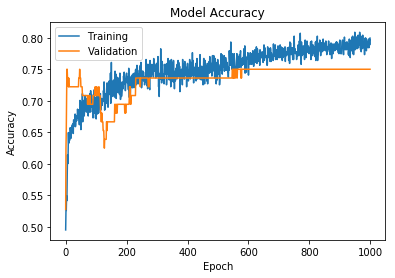

In [191]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

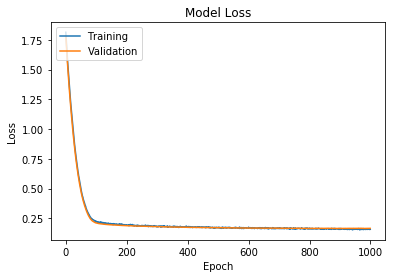

In [192]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

In [193]:
y_pred=model.predict_classes(x_test)
y_test= [int(i) for i in y_test]

In [194]:
y_pred=y_pred.reshape(180)

In [195]:
print("Confusion Matrix")
pd.DataFrame(confusion_matrix(y_test, y_pred),
                   index=['True:yes', 'True: no'],
                   columns=['Pred: yes', 'Pred: no'])

Confusion Matrix


,Pred: yes,Pred: no
True:yes,93,27
True: no,15,45


In [196]:
model.save('model3New.h5')